In [59]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [60]:
n_task_per_file = 50
n_files = 10
base_dir = "toy_eg_"
files_list = []
for i in range(n_files):
    dir = base_dir + str(i*n_task_per_file) + "_"  + str((i+1)*n_task_per_file) + ".pkl"
    files_list.append(dir)

In [61]:
coverage_df = pd.DataFrame()
length_df = pd.DataFrame()
MSE_df = pd.DataFrame()

for f_dir in files_list:
    coverage_i, length_i, MSE_i = joblib.load(f_dir)
    coverage_df = pd.concat([coverage_df, pd.DataFrame(coverage_i)])
    length_df = pd.concat([length_df, pd.DataFrame(length_i)])
    MSE_df = pd.concat([MSE_df, pd.DataFrame(MSE_i)])

In [62]:
coverage_df

,1.0,2.5,5.0,10.0,Tree val,Naive
0,1.000000,1.000000,1.000000,0.857143,0.833333,0.833333
1,0.833333,1.000000,1.000000,0.666667,0.833333,0.666667
2,1.000000,1.000000,1.000000,1.000000,1.000000,0.666667
3,0.833333,1.000000,1.000000,0.666667,1.000000,0.666667
4,1.000000,0.833333,0.833333,1.000000,1.000000,0.500000
...,...,...,...,...,...,...
42,1.000000,0.857143,1.000000,0.833333,1.000000,0.600000
43,0.666667,0.666667,1.000000,1.000000,0.833333,0.666667
44,1.000000,0.666667,0.833333,1.000000,1.000000,0.714286
45,1.000000,1.000000,1.000000,0.833333,1.000000,0.857143


In [63]:
length_df

,1.0,2.5,5.0,10.0,Tree val,Naive
0,2.601838,1.799047,1.605325,1.352729,35.349307,1.203743
1,2.046969,1.619858,2.100097,1.246522,21.243081,1.156089
2,2.139961,1.416978,1.212222,1.392048,10.227776,1.152270
3,2.104251,1.958884,1.140231,1.193629,5.346142,1.171470
4,2.067356,1.479312,1.270595,1.552728,3.984738,1.174641
...,...,...,...,...,...,...
42,1.677209,1.375485,1.564700,1.338164,3.725496,1.067809
43,2.063517,1.340308,1.232236,1.936001,17.737119,1.176150
44,2.266322,1.358890,1.249673,1.549051,8.360417,1.241151
45,1.888292,1.498843,1.471528,1.183160,21.842801,1.262733


In [64]:
MSE_df

,1.0,2.5,5.0,10.0,Tree val,Naive
0,3.915597,3.693723,4.180864,5.330214,3.934278,3.934278
1,5.704010,4.899560,5.047779,5.904556,4.812223,4.812223
2,4.591956,4.779910,4.938651,5.229897,4.682566,4.682566
3,4.888599,5.031058,5.388795,6.579713,5.264647,5.264647
4,4.910416,5.404187,5.468519,4.896158,4.877254,4.877254
...,...,...,...,...,...,...
42,4.191733,4.679213,4.954367,5.228334,4.626087,4.626087
43,4.468915,4.706815,5.314279,4.816666,4.349410,4.349410
44,4.334327,4.600354,5.392131,5.433852,4.371898,4.371898
45,3.702821,4.674201,4.299779,5.368070,3.812330,3.812330


In [65]:
import seaborn as sns
def boxplots(dfs, metrics, len_lim=10, MSE_lim=10, 
             len_baseline_key=None, MSE_baseline_key=None):
    # Set up the subplots: one for each metric
    fig, axes = plt.subplots(1, 3, figsize=(15, 6))
    
    # Iterate over the dataframes and create a boxplot for each
    for i, (df, metric) in enumerate(zip(dfs, metrics)):
        sns.boxplot(data=df, ax=axes[i])
        axes[i].set_title(f'Boxplot for {metric}')
        axes[i].set_xlabel('Method')
        axes[i].set_ylabel('Value')
        # Add triangles for the mean values
        means = df.mean()  # Calculate mean for each method (column)
        print(metric,":\n",means.T)
        for j, mean in enumerate(means):
            axes[i].plot(j, mean, marker='^', color='red', markersize=10)  # Add a red triangle for the mean
        if metric == "Coverage":
            axes[i].set_ylim(0,1)
            axes[i].axhline(y=0.9, linestyle='dotted', color='grey')
        elif metric == "Length":
            axes[i].set_ylim(0,len_lim)
            if len_baseline_key:
                axes[i].axhline(y=means[len_baseline_key], linestyle='dotted', color='grey')
        elif metric == "MSE":
            axes[i].set_ylim(0,MSE_lim)
            if MSE_baseline_key:
                axes[i].axhline(y=means[MSE_baseline_key], linestyle='dotted', color='grey')
    
    # Show the plots
    plt.tight_layout()
    plt.show()

Coverage :
 RRT(1)         0.904471
RRT(2.5)       0.874707
RRT(5)         0.870737
RRT(10)        0.882316
Tree-Values    0.922125
Naive          0.663238
dtype: float64
Length :
 RRT(1)          2.533011
RRT(2.5)        4.326291
RRT(5)          2.565587
RRT(10)         1.708466
Tree-Values    23.677874
Naive           1.171666
dtype: float64
MSE :
 RRT(1)         4.745143
RRT(2.5)       4.907429
RRT(5)         5.184830
RRT(10)        5.459463
Tree-Values    4.721245
Naive          4.721245
dtype: float64


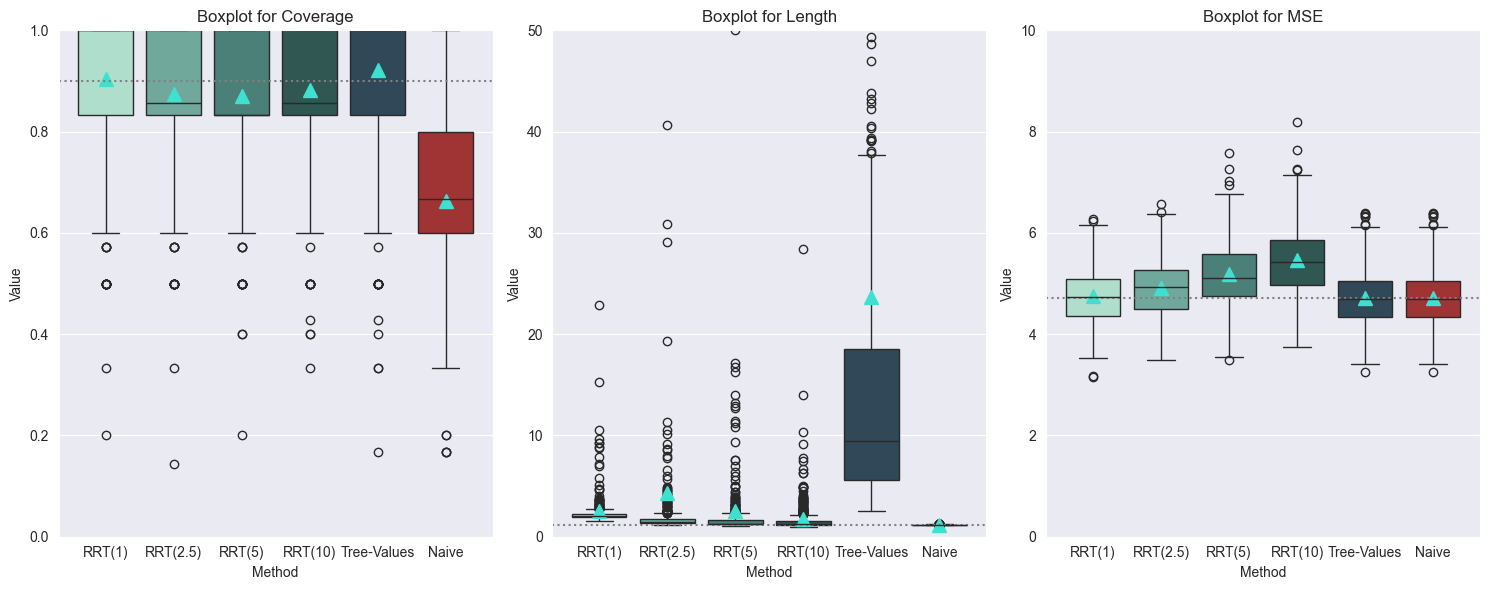

In [66]:
boxplots(dfs=[coverage_df, 
              length_df, 
              MSE_df], 
         len_lim=30,
         len_baseline_key="Naive",
         MSE_baseline_key="Naive",
         metrics=["Coverage", "Length", "MSE"])

In [11]:
# TODO: Case 1 with 1, 5, 10